<a href="https://colab.research.google.com/github/zabop/autoeap/blob/master/examples/spline_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### If you are in Google Colab, first install the package

In [ ]:
!pip install git+https://github.com/zabop/autoeap

## Example: fit and remove low-order spline from raw light curve

As slowly varying trends can be present in the raw light curve, it may be useful to eliminate it.

As an example, you can download a light curve from MAST.

In [1]:
from autoeap import createlightcurve

targetID = 'EPIC 248783511'
campaign = 14

And enable spline correction. By default, the length of the filter window for spline correction is 20 days. If you are not satisfied with fitted spline, you can choose another length. e.g. shorter if you want to smooth your light curve more.

To compare the raw and the spline corrected light curves, you can save the results to a file.

In [2]:
time,flux,flux_err = createlightcurve(
        targetID,              # Path to TPF or EPIC ID
        apply_K2SC=False,      # Apply K2 systematic correction
        remove_spline=True,    # Fit and remove low-order spline
        save_lc=True,          # Save final light curve to file
        campaign=campaign,     # K2 campaign number if TPF should be downladed
        TH=8,                  # Empirically determined tuning parameter
        show_plots=False,      # Vizualize steps inside notebook
        save_plots=False,      # Save plot files in a folder
        window_length=20       # The window length of the fitted spline in days.
        )

Local TPF not found, trying to download TPF instead
TPF found on MAST: K2 Campaign 14
Finding PSF centroids and removing outliers
Optimizing apertures for each cadence



Starting iteration
Iteration: 1
Iteration: 2
Iteration: 3
Iteration finished
Removing spline
Saving lc as EPIC_248783511_autoEAP_lc_TH8_spline.lc
Done


#### Visualize the corrected result

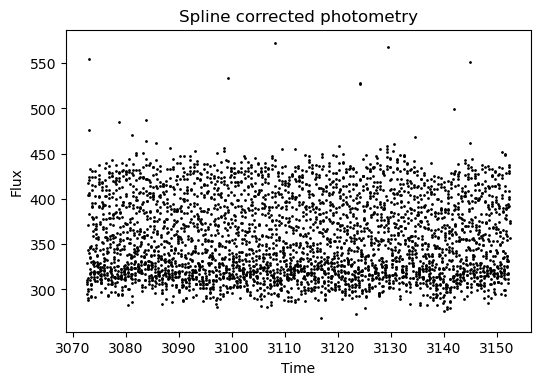

In [3]:
import matplotlib.pyplot as plt

plt.figure(dpi=100)
plt.title('Spline corrected photometry')
plt.scatter(time, flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

#### Compare the raw and corrected results

Load saved data.

In [4]:
import pandas as pd

lc = pd.read_csv('EPIC_248783511_autoEAP_lc_TH8_spline.lc',delim_whitespace=True)
lc

,time,flux,flux_err,splined_flux
0,3072.728674,315.97480,4.670032,310.109736
1,3072.749106,335.18810,4.670747,328.986159
2,3072.769539,313.86252,4.669506,308.073621
3,3072.789971,311.61078,4.669043,305.881735
4,3072.810404,300.55810,4.667648,295.049927
...,...,...,...,...
3681,3152.310874,420.37793,5.011431,402.043877
3682,3152.331306,410.32104,5.010759,392.411139
3683,3152.372170,393.23850,5.011119,376.046491
3684,3152.392601,390.26483,5.011299,373.189078


As you can see, there are four columns. Let's compare the results.

The spline can be reproduced by dividing the raw and corrected light curves.

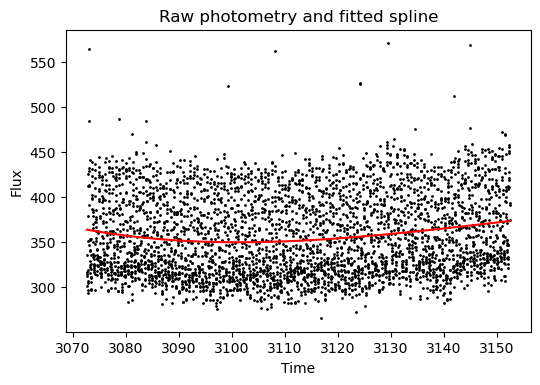

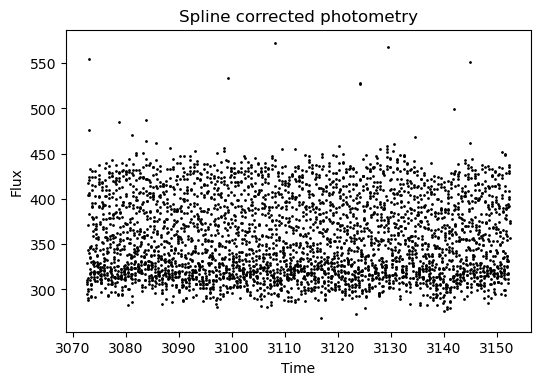

In [5]:
spline = ( lc.flux/lc.splined_flux ) * lc.flux.mean()

plt.figure(dpi=100)
plt.title('Raw photometry and fitted spline')
plt.scatter(lc.time, lc.flux, s=1, color='black')
plt.plot(lc.time, spline, c='r')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()

plt.figure(dpi=100)
plt.title('Spline corrected photometry')
plt.scatter(lc.time, lc.splined_flux, s=1, color='black')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()
plt.close()